In [ ]:
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
import yfinance as yf
from datetime import datetime

In [ ]:
AAPL=pd.read_csv(r"C:\Users\Arshdeep\Downloads\Sentiment-Analysis-of-Twitter-Data-for-predicting-Apple-stock-price-master\Sentiment-Analysis-of-Twitter-Data-for-predicting-Apple-stock-price-master\Final_data.csv")

In [ ]:
AAPL.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ts_polarity,twitter_volume
0,2018-12-26,37.075001,39.307499,36.680000,39.292500,37.987072,234330000,0.070389,1133.0
1,2018-12-27,38.959999,39.192501,37.517502,39.037498,37.740551,212468400,0.133635,1430.0
2,2018-12-28,39.375000,39.630001,38.637501,39.057499,37.759888,169165600,0.072042,1949.0
3,2018-12-31,39.632500,39.840000,39.119999,39.435001,38.124847,140014000,0.074369,2289.0
4,2019-01-02,38.722500,39.712502,38.557499,39.480000,38.168354,148158800,0.051595,2235.0


In [ ]:
AAPL.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,ts_polarity,twitter_volume
917,2022-08-17,172.770004,176.149994,172.570007,174.550003,174.550003,79542000,0.072340,888.0
918,2022-08-18,173.750000,174.899994,173.119995,174.149994,174.149994,62290100,0.117541,962.0
919,2022-08-19,173.029999,173.740005,171.309998,171.520004,171.520004,70211500,0.061477,895.0
920,2022-08-22,169.690002,169.860001,167.139999,167.570007,167.570007,68952600,0.056460,1083.0
921,2022-08-23,167.080002,168.701096,166.649994,167.900208,167.900208,39887661,0.106096,1005.0


In [ ]:
from gym_anytrading.envs import StocksEnv
from finta import TA

In [ ]:
AAPL['SMA'] = TA.SMA(AAPL, 12)
AAPL['RSI'] = TA.RSI(AAPL)
AAPL['OBV'] = TA.OBV(AAPL)
AAPL.fillna(0, inplace=True)

In [ ]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume','SMA', 'RSI', 'OBV','ts_polarity','twitter_volume']].to_numpy()[start:end]
    return prices, signal_features

In [ ]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env2 = MyCustomEnv(df=AAPL, window_size=5, frame_bound=(5,len(AAPL)-100))

In [ ]:
env2.signal_features

array([[ 4.10974998e+01,  1.35366000e+08,  0.00000000e+00, ...,
         0.00000000e+00,  7.03890000e-02,  1.13300000e+03],
       [ 3.97724991e+01,  1.96189200e+08,  0.00000000e+00, ...,
        -1.96189200e+08,  1.33635000e-01,  1.43000000e+03],
       [ 3.88250008e+01,  2.59092000e+08,  0.00000000e+00, ...,
        -4.55281200e+08,  7.20420000e-02,  1.94900000e+03],
       ...,
       [ 1.63009995e+02,  9.58114000e+07,  1.59282499e+02, ...,
         3.34065440e+09,  1.40556000e-01,  1.11200000e+03],
       [ 1.64910004e+02,  8.15320000e+07,  1.59753333e+02, ...,
         3.42218640e+09,  8.40790000e-02,  9.66000000e+02],
       [ 1.67649994e+02,  9.80627000e+07,  1.60662500e+02, ...,
         3.52024910e+09,  1.35229000e-01,  1.59000000e+03]])

In [ ]:
len(env2.signal_features[0])

7

info {'total_reward': 35.0600471496582, 'total_profit': 0.06204556803490663, 'position': 1}


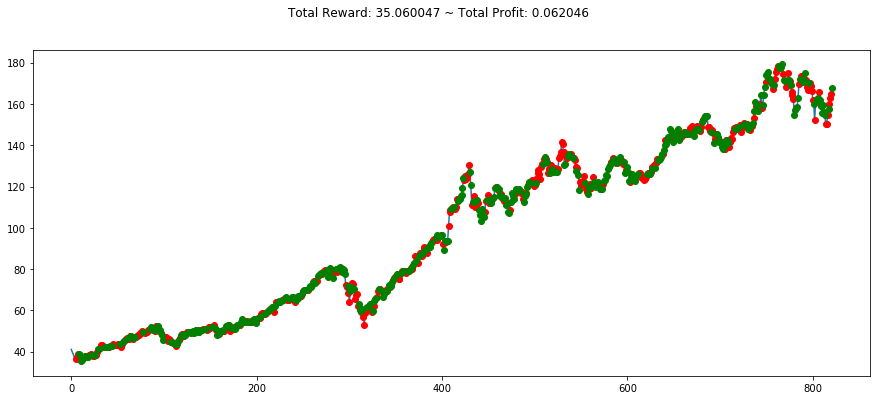

In [ ]:
state = env2.reset()
while True: 
    action = env2.action_space.sample()
    n_state, reward, done, info = env2.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env2.render_all()
plt.show()

In [ ]:
env_maker = lambda: gym.make('stocks-v0', df=AAPL, frame_bound=(5,len(AAPL)-100), window_size=5)
env = DummyVecEnv([env_maker])

In [ ]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


---------------------------------
| explained_variance | -578     |
| fps                | 13       |
| nupdates           | 1        |
| policy_entropy     | 0.69     |
| total_timesteps    | 5        |
| value_loss         | 0.00117  |
---------------------------------
---------------------------------
| explained_variance | -0.00153 |
| fps                | 306      |
| nupdates           | 100      |
| policy_entropy     | 0.69     |
| total_timesteps    | 500      |
| value_loss         | 21.3     |
---------------------------------
---------------------------------
| explained_variance | -9.66    |
| fps                | 387     

---------------------------------
| explained_variance | -0.0805  |
| fps                | 404      |
| nupdates           | 1700     |
| policy_entropy     | 0.685    |
| total_timesteps    | 8500     |
| value_loss         | 0.42     |
---------------------------------
---------------------------------
| explained_variance | -0.146   |
| fps                | 401      |
| nupdates           | 1800     |
| policy_entropy     | 0.64     |
| total_timesteps    | 9000     |
| value_loss         | 0.202    |
---------------------------------
---------------------------------
| explained_variance | 0.00995  |
| fps                | 401      |
| nupdates           | 1900     |
| policy_entropy     | 0.688    |
| total_timesteps    | 9500     |
| value_loss         | 28       |
---------------------------------
---------------------------------
| explained_variance | 0.702    |
| fps                | 403      |
| nupdates           | 2000     |
| policy_entropy     | 0.677    |
| total_timest

---------------------------------
| explained_variance | -0.184   |
| fps                | 412      |
| nupdates           | 4800     |
| policy_entropy     | 0.691    |
| total_timesteps    | 24000    |
| value_loss         | 0.0141   |
---------------------------------
---------------------------------
| explained_variance | 0.00941  |
| fps                | 413      |
| nupdates           | 4900     |
| policy_entropy     | 0.693    |
| total_timesteps    | 24500    |
| value_loss         | 1.05     |
---------------------------------
---------------------------------
| explained_variance | -0.00462 |
| fps                | 414      |
| nupdates           | 5000     |
| policy_entropy     | 0.692    |
| total_timesteps    | 25000    |
| value_loss         | 0.628    |
---------------------------------
---------------------------------
| explained_variance | 0.0177   |
| fps                | 414      |
| nupdates           | 5100     |
| policy_entropy     | 0.691    |
| total_timest

---------------------------------
| explained_variance | 0.00922  |
| fps                | 416      |
| nupdates           | 7900     |
| policy_entropy     | 0.682    |
| total_timesteps    | 39500    |
| value_loss         | 0.488    |
---------------------------------
---------------------------------
| explained_variance | 0.00379  |
| fps                | 416      |
| nupdates           | 8000     |
| policy_entropy     | 0.692    |
| total_timesteps    | 40000    |
| value_loss         | 0.716    |
---------------------------------
----------------------------------
| explained_variance | -0.000882 |
| fps                | 416       |
| nupdates           | 8100      |
| policy_entropy     | 0.691     |
| total_timesteps    | 40500     |
| value_loss         | 4.25      |
----------------------------------
---------------------------------
| explained_variance | -0.0139  |
| fps                | 417      |
| nupdates           | 8200     |
| policy_entropy     | 0.693    |
| tota

---------------------------------
| explained_variance | -0.00835 |
| fps                | 420      |
| nupdates           | 11000    |
| policy_entropy     | 0.693    |
| total_timesteps    | 55000    |
| value_loss         | 19.9     |
---------------------------------
---------------------------------
| explained_variance | 0.0239   |
| fps                | 420      |
| nupdates           | 11100    |
| policy_entropy     | 0.66     |
| total_timesteps    | 55500    |
| value_loss         | 0.0176   |
---------------------------------
---------------------------------
| explained_variance | 0.00452  |
| fps                | 420      |
| nupdates           | 11200    |
| policy_entropy     | 0.692    |
| total_timesteps    | 56000    |
| value_loss         | 1.24     |
---------------------------------
---------------------------------
| explained_variance | 0.00523  |
| fps                | 419      |
| nupdates           | 11300    |
| policy_entropy     | 0.675    |
| total_timest

---------------------------------
| explained_variance | 0.000106 |
| fps                | 420      |
| nupdates           | 14100    |
| policy_entropy     | 0.688    |
| total_timesteps    | 70500    |
| value_loss         | 10.2     |
---------------------------------
---------------------------------
| explained_variance | 0.00717  |
| fps                | 420      |
| nupdates           | 14200    |
| policy_entropy     | 0.692    |
| total_timesteps    | 71000    |
| value_loss         | 3.82     |
---------------------------------
---------------------------------
| explained_variance | 0.000255 |
| fps                | 420      |
| nupdates           | 14300    |
| policy_entropy     | 0.69     |
| total_timesteps    | 71500    |
| value_loss         | 7.64     |
---------------------------------
---------------------------------
| explained_variance | 0.000575 |
| fps                | 420      |
| nupdates           | 14400    |
| policy_entropy     | 0.693    |
| total_timest

---------------------------------
| explained_variance | -0.00192 |
| fps                | 423      |
| nupdates           | 17100    |
| policy_entropy     | 0.679    |
| total_timesteps    | 85500    |
| value_loss         | 0.0458   |
---------------------------------
----------------------------------
| explained_variance | -4.36e-05 |
| fps                | 423       |
| nupdates           | 17200     |
| policy_entropy     | 0.692     |
| total_timesteps    | 86000     |
| value_loss         | 1.08      |
----------------------------------
---------------------------------
| explained_variance | 0.0359   |
| fps                | 423      |
| nupdates           | 17300    |
| policy_entropy     | 0.687    |
| total_timesteps    | 86500    |
| value_loss         | 7.32     |
---------------------------------
----------------------------------
| explained_variance | -0.000134 |
| fps                | 423       |
| nupdates           | 17400     |
| policy_entropy     | 0.691     |
|

---------------------------------
| explained_variance | -0.00207 |
| fps                | 425      |
| nupdates           | 20100    |
| policy_entropy     | 0.693    |
| total_timesteps    | 100500   |
| value_loss         | 1.36     |
---------------------------------
---------------------------------
| explained_variance | 0.000118 |
| fps                | 425      |
| nupdates           | 20200    |
| policy_entropy     | 0.693    |
| total_timesteps    | 101000   |
| value_loss         | 1.51     |
---------------------------------
----------------------------------
| explained_variance | -0.000622 |
| fps                | 425       |
| nupdates           | 20300     |
| policy_entropy     | 0.684     |
| total_timesteps    | 101500    |
| value_loss         | 0.129     |
----------------------------------
---------------------------------
| explained_variance | 2.74e-05 |
| fps                | 426      |
| nupdates           | 20400    |
| policy_entropy     | 0.639    |
| tota

---------------------------------
| explained_variance | 0.000604 |
| fps                | 426      |
| nupdates           | 23100    |
| policy_entropy     | 0.668    |
| total_timesteps    | 115500   |
| value_loss         | 9.34     |
---------------------------------
---------------------------------
| explained_variance | -0.00741 |
| fps                | 426      |
| nupdates           | 23200    |
| policy_entropy     | 0.692    |
| total_timesteps    | 116000   |
| value_loss         | 0.0214   |
---------------------------------
----------------------------------
| explained_variance | -0.000211 |
| fps                | 426       |
| nupdates           | 23300     |
| policy_entropy     | 0.693     |
| total_timesteps    | 116500    |
| value_loss         | 0.717     |
----------------------------------
---------------------------------
| explained_variance | 0.0035   |
| fps                | 426      |
| nupdates           | 23400    |
| policy_entropy     | 0.691    |
| tota

----------------------------------
| explained_variance | -0.000356 |
| fps                | 428       |
| nupdates           | 26100     |
| policy_entropy     | 0.689     |
| total_timesteps    | 130500    |
| value_loss         | 0.172     |
----------------------------------
---------------------------------
| explained_variance | 0.00016  |
| fps                | 428      |
| nupdates           | 26200    |
| policy_entropy     | 0.69     |
| total_timesteps    | 131000   |
| value_loss         | 19.9     |
---------------------------------
---------------------------------
| explained_variance | 0.000831 |
| fps                | 428      |
| nupdates           | 26300    |
| policy_entropy     | 0.688    |
| total_timesteps    | 131500   |
| value_loss         | 0.842    |
---------------------------------
---------------------------------
| explained_variance | -0.00353 |
| fps                | 428      |
| nupdates           | 26400    |
| policy_entropy     | 0.685    |
| tota

---------------------------------
| explained_variance | 0.00432  |
| fps                | 428      |
| nupdates           | 29100    |
| policy_entropy     | 0.693    |
| total_timesteps    | 145500   |
| value_loss         | 0.0127   |
---------------------------------
----------------------------------
| explained_variance | -0.000224 |
| fps                | 428       |
| nupdates           | 29200     |
| policy_entropy     | 0.69      |
| total_timesteps    | 146000    |
| value_loss         | 15.4      |
----------------------------------
----------------------------------
| explained_variance | -0.000287 |
| fps                | 427       |
| nupdates           | 29300     |
| policy_entropy     | 0.689     |
| total_timesteps    | 146500    |
| value_loss         | 50.3      |
----------------------------------
----------------------------------
| explained_variance | -0.000958 |
| fps                | 427       |
| nupdates           | 29400     |
| policy_entropy     | 0.677

---------------------------------
| explained_variance | 0.000774 |
| fps                | 427      |
| nupdates           | 32100    |
| policy_entropy     | 0.688    |
| total_timesteps    | 160500   |
| value_loss         | 0.203    |
---------------------------------
---------------------------------
| explained_variance | 0.00177  |
| fps                | 427      |
| nupdates           | 32200    |
| policy_entropy     | 0.693    |
| total_timesteps    | 161000   |
| value_loss         | 0.114    |
---------------------------------
---------------------------------
| explained_variance | 0.000209 |
| fps                | 427      |
| nupdates           | 32300    |
| policy_entropy     | 0.693    |
| total_timesteps    | 161500   |
| value_loss         | 15.6     |
---------------------------------
----------------------------------
| explained_variance | -0.000797 |
| fps                | 427       |
| nupdates           | 32400     |
| policy_entropy     | 0.693     |
| total_t

---------------------------------
| explained_variance | 0.00102  |
| fps                | 431      |
| nupdates           | 35100    |
| policy_entropy     | 0.684    |
| total_timesteps    | 175500   |
| value_loss         | 0.298    |
---------------------------------
---------------------------------
| explained_variance | -3.7e-05 |
| fps                | 431      |
| nupdates           | 35200    |
| policy_entropy     | 0.678    |
| total_timesteps    | 176000   |
| value_loss         | 11       |
---------------------------------
---------------------------------
| explained_variance | 0.00197  |
| fps                | 432      |
| nupdates           | 35300    |
| policy_entropy     | 0.69     |
| total_timesteps    | 176500   |
| value_loss         | 1.23     |
---------------------------------
---------------------------------
| explained_variance | 0.0544   |
| fps                | 432      |
| nupdates           | 35400    |
| policy_entropy     | 0.693    |
| total_timest

---------------------------------
| explained_variance | -0.0159  |
| fps                | 438      |
| nupdates           | 38100    |
| policy_entropy     | 0.683    |
| total_timesteps    | 190500   |
| value_loss         | 1.96     |
---------------------------------
----------------------------------
| explained_variance | -0.000127 |
| fps                | 438       |
| nupdates           | 38200     |
| policy_entropy     | 0.693     |
| total_timesteps    | 191000    |
| value_loss         | 6.17      |
----------------------------------
---------------------------------
| explained_variance | -0.00842 |
| fps                | 438      |
| nupdates           | 38300    |
| policy_entropy     | 0.685    |
| total_timesteps    | 191500   |
| value_loss         | 0.02     |
---------------------------------
---------------------------------
| explained_variance | 0.0136   |
| fps                | 439      |
| nupdates           | 38400    |
| policy_entropy     | 0.691    |
| tota

---------------------------------
| explained_variance | 5.96e-07 |
| fps                | 444      |
| nupdates           | 41100    |
| policy_entropy     | 0.683    |
| total_timesteps    | 205500   |
| value_loss         | 36.6     |
---------------------------------
----------------------------------
| explained_variance | -0.000268 |
| fps                | 444       |
| nupdates           | 41200     |
| policy_entropy     | 0.692     |
| total_timesteps    | 206000    |
| value_loss         | 3.63      |
----------------------------------
---------------------------------
| explained_variance | 0.00084  |
| fps                | 444      |
| nupdates           | 41300    |
| policy_entropy     | 0.693    |
| total_timesteps    | 206500   |
| value_loss         | 0.0202   |
---------------------------------
----------------------------------
| explained_variance | -9.18e-06 |
| fps                | 445       |
| nupdates           | 41400     |
| policy_entropy     | 0.693     |
|

---------------------------------
| explained_variance | 0.0732   |
| fps                | 451      |
| nupdates           | 44100    |
| policy_entropy     | 0.692    |
| total_timesteps    | 220500   |
| value_loss         | 1.43     |
---------------------------------
---------------------------------
| explained_variance | 5.45e-05 |
| fps                | 451      |
| nupdates           | 44200    |
| policy_entropy     | 0.693    |
| total_timesteps    | 221000   |
| value_loss         | 13.8     |
---------------------------------
---------------------------------
| explained_variance | -0.00526 |
| fps                | 451      |
| nupdates           | 44300    |
| policy_entropy     | 0.693    |
| total_timesteps    | 221500   |
| value_loss         | 0.018    |
---------------------------------
---------------------------------
| explained_variance | -0.00232 |
| fps                | 451      |
| nupdates           | 44400    |
| policy_entropy     | 0.69     |
| total_timest

---------------------------------
| explained_variance | -0.0189  |
| fps                | 458      |
| nupdates           | 47200    |
| policy_entropy     | 0.692    |
| total_timesteps    | 236000   |
| value_loss         | 0.486    |
---------------------------------
---------------------------------
| explained_variance | 0.000221 |
| fps                | 458      |
| nupdates           | 47300    |
| policy_entropy     | 0.688    |
| total_timesteps    | 236500   |
| value_loss         | 1.15     |
---------------------------------
---------------------------------
| explained_variance | 0.0141   |
| fps                | 458      |
| nupdates           | 47400    |
| policy_entropy     | 0.684    |
| total_timesteps    | 237000   |
| value_loss         | 0.017    |
---------------------------------
---------------------------------
| explained_variance | -0.0474  |
| fps                | 458      |
| nupdates           | 47500    |
| policy_entropy     | 0.689    |
| total_timest

---------------------------------
| explained_variance | -0.0118  |
| fps                | 465      |
| nupdates           | 50300    |
| policy_entropy     | 0.678    |
| total_timesteps    | 251500   |
| value_loss         | 0.0205   |
---------------------------------
---------------------------------
| explained_variance | -0.00693 |
| fps                | 465      |
| nupdates           | 50400    |
| policy_entropy     | 0.688    |
| total_timesteps    | 252000   |
| value_loss         | 0.00334  |
---------------------------------
---------------------------------
| explained_variance | -0.237   |
| fps                | 465      |
| nupdates           | 50500    |
| policy_entropy     | 0.691    |
| total_timesteps    | 252500   |
| value_loss         | 0.157    |
---------------------------------
---------------------------------
| explained_variance | 0.0159   |
| fps                | 465      |
| nupdates           | 50600    |
| policy_entropy     | 0.678    |
| total_timest

----------------------------------
| explained_variance | -3.71e-05 |
| fps                | 469       |
| nupdates           | 53300     |
| policy_entropy     | 0.687     |
| total_timesteps    | 266500    |
| value_loss         | 14.4      |
----------------------------------
---------------------------------
| explained_variance | -0.0123  |
| fps                | 469      |
| nupdates           | 53400    |
| policy_entropy     | 0.692    |
| total_timesteps    | 267000   |
| value_loss         | 3.96     |
---------------------------------
---------------------------------
| explained_variance | -0.0749  |
| fps                | 469      |
| nupdates           | 53500    |
| policy_entropy     | 0.688    |
| total_timesteps    | 267500   |
| value_loss         | 0.266    |
---------------------------------
----------------------------------
| explained_variance | -0.000318 |
| fps                | 469       |
| nupdates           | 53600     |
| policy_entropy     | 0.693     |
|

---------------------------------
| explained_variance | -0.269   |
| fps                | 475      |
| nupdates           | 56400    |
| policy_entropy     | 0.689    |
| total_timesteps    | 282000   |
| value_loss         | 0.211    |
---------------------------------
---------------------------------
| explained_variance | -0.00485 |
| fps                | 475      |
| nupdates           | 56500    |
| policy_entropy     | 0.693    |
| total_timesteps    | 282500   |
| value_loss         | 1.07     |
---------------------------------
---------------------------------
| explained_variance | 0.203    |
| fps                | 475      |
| nupdates           | 56600    |
| policy_entropy     | 0.692    |
| total_timesteps    | 283000   |
| value_loss         | 0.0902   |
---------------------------------
---------------------------------
| explained_variance | 0.0241   |
| fps                | 475      |
| nupdates           | 56700    |
| policy_entropy     | 0.693    |
| total_timest

---------------------------------
| explained_variance | 0.233    |
| fps                | 479      |
| nupdates           | 59500    |
| policy_entropy     | 0.682    |
| total_timesteps    | 297500   |
| value_loss         | 9.01     |
---------------------------------
---------------------------------
| explained_variance | -0.0227  |
| fps                | 479      |
| nupdates           | 59600    |
| policy_entropy     | 0.668    |
| total_timesteps    | 298000   |
| value_loss         | 0.0997   |
---------------------------------
---------------------------------
| explained_variance | 0.00628  |
| fps                | 479      |
| nupdates           | 59700    |
| policy_entropy     | 0.693    |
| total_timesteps    | 298500   |
| value_loss         | 0.578    |
---------------------------------
---------------------------------
| explained_variance | 0.00478  |
| fps                | 479      |
| nupdates           | 59800    |
| policy_entropy     | 0.693    |
| total_timest

---------------------------------
| explained_variance | -0.0278  |
| fps                | 483      |
| nupdates           | 62600    |
| policy_entropy     | 0.688    |
| total_timesteps    | 313000   |
| value_loss         | 9.32     |
---------------------------------
---------------------------------
| explained_variance | 0.142    |
| fps                | 483      |
| nupdates           | 62700    |
| policy_entropy     | 0.66     |
| total_timesteps    | 313500   |
| value_loss         | 2.32     |
---------------------------------
---------------------------------
| explained_variance | 0.469    |
| fps                | 483      |
| nupdates           | 62800    |
| policy_entropy     | 0.684    |
| total_timesteps    | 314000   |
| value_loss         | 1.72     |
---------------------------------
---------------------------------
| explained_variance | 0.159    |
| fps                | 484      |
| nupdates           | 62900    |
| policy_entropy     | 0.671    |
| total_timest

---------------------------------
| explained_variance | -0.00116 |
| fps                | 487      |
| nupdates           | 65700    |
| policy_entropy     | 0.637    |
| total_timesteps    | 328500   |
| value_loss         | 44.9     |
---------------------------------
---------------------------------
| explained_variance | -0.735   |
| fps                | 487      |
| nupdates           | 65800    |
| policy_entropy     | 0.668    |
| total_timesteps    | 329000   |
| value_loss         | 0.00899  |
---------------------------------
---------------------------------
| explained_variance | 0.00449  |
| fps                | 487      |
| nupdates           | 65900    |
| policy_entropy     | 0.644    |
| total_timesteps    | 329500   |
| value_loss         | 0.0526   |
---------------------------------
---------------------------------
| explained_variance | 0.00318  |
| fps                | 488      |
| nupdates           | 66000    |
| policy_entropy     | 0.656    |
| total_timest

---------------------------------
| explained_variance | 0.197    |
| fps                | 491      |
| nupdates           | 68800    |
| policy_entropy     | 0.693    |
| total_timesteps    | 344000   |
| value_loss         | 21       |
---------------------------------
---------------------------------
| explained_variance | -0.0191  |
| fps                | 491      |
| nupdates           | 68900    |
| policy_entropy     | 0.689    |
| total_timesteps    | 344500   |
| value_loss         | 0.0995   |
---------------------------------
---------------------------------
| explained_variance | 0.00114  |
| fps                | 491      |
| nupdates           | 69000    |
| policy_entropy     | 0.688    |
| total_timesteps    | 345000   |
| value_loss         | 4.91     |
---------------------------------
---------------------------------
| explained_variance | 0.000684 |
| fps                | 491      |
| nupdates           | 69100    |
| policy_entropy     | 0.66     |
| total_timest

---------------------------------
| explained_variance | 0.0114   |
| fps                | 494      |
| nupdates           | 71800    |
| policy_entropy     | 0.693    |
| total_timesteps    | 359000   |
| value_loss         | 0.0151   |
---------------------------------
---------------------------------
| explained_variance | 0.000193 |
| fps                | 494      |
| nupdates           | 71900    |
| policy_entropy     | 0.693    |
| total_timesteps    | 359500   |
| value_loss         | 0.558    |
---------------------------------
---------------------------------
| explained_variance | 0.0108   |
| fps                | 495      |
| nupdates           | 72000    |
| policy_entropy     | 0.693    |
| total_timesteps    | 360000   |
| value_loss         | 0.0157   |
---------------------------------
---------------------------------
| explained_variance | 0.00544  |
| fps                | 495      |
| nupdates           | 72100    |
| policy_entropy     | 0.692    |
| total_timest

---------------------------------
| explained_variance | 0.000395 |
| fps                | 498      |
| nupdates           | 74800    |
| policy_entropy     | 0.688    |
| total_timesteps    | 374000   |
| value_loss         | 4.11     |
---------------------------------
----------------------------------
| explained_variance | -9.49e-05 |
| fps                | 498       |
| nupdates           | 74900     |
| policy_entropy     | 0.684     |
| total_timesteps    | 374500    |
| value_loss         | 27        |
----------------------------------
----------------------------------
| explained_variance | -0.000457 |
| fps                | 498       |
| nupdates           | 75000     |
| policy_entropy     | 0.691     |
| total_timesteps    | 375000    |
| value_loss         | 4.75      |
----------------------------------
---------------------------------
| explained_variance | 0.00214  |
| fps                | 498      |
| nupdates           | 75100    |
| policy_entropy     | 0.685    

---------------------------------
| explained_variance | 9.1e-05  |
| fps                | 501      |
| nupdates           | 77800    |
| policy_entropy     | 0.692    |
| total_timesteps    | 389000   |
| value_loss         | 0.524    |
---------------------------------
---------------------------------
| explained_variance | -0.0005  |
| fps                | 501      |
| nupdates           | 77900    |
| policy_entropy     | 0.693    |
| total_timesteps    | 389500   |
| value_loss         | 0.148    |
---------------------------------
---------------------------------
| explained_variance | 5.3e-06  |
| fps                | 501      |
| nupdates           | 78000    |
| policy_entropy     | 0.692    |
| total_timesteps    | 390000   |
| value_loss         | 38.7     |
---------------------------------
---------------------------------
| explained_variance | -0.0014  |
| fps                | 501      |
| nupdates           | 78100    |
| policy_entropy     | 0.691    |
| total_timest

---------------------------------
| explained_variance | 0.000432 |
| fps                | 504      |
| nupdates           | 80900    |
| policy_entropy     | 0.69     |
| total_timesteps    | 404500   |
| value_loss         | 0.101    |
---------------------------------
---------------------------------
| explained_variance | 4.35e-05 |
| fps                | 504      |
| nupdates           | 81000    |
| policy_entropy     | 0.688    |
| total_timesteps    | 405000   |
| value_loss         | 15.7     |
---------------------------------
---------------------------------
| explained_variance | 0.000319 |
| fps                | 504      |
| nupdates           | 81100    |
| policy_entropy     | 0.686    |
| total_timesteps    | 405500   |
| value_loss         | 0.88     |
---------------------------------
---------------------------------
| explained_variance | 5.36e-07 |
| fps                | 504      |
| nupdates           | 81200    |
| policy_entropy     | 0.691    |
| total_timest

----------------------------------
| explained_variance | -0.000326 |
| fps                | 506       |
| nupdates           | 83900     |
| policy_entropy     | 0.693     |
| total_timesteps    | 419500    |
| value_loss         | 0.107     |
----------------------------------
---------------------------------
| explained_variance | 2.13e-05 |
| fps                | 506      |
| nupdates           | 84000    |
| policy_entropy     | 0.688    |
| total_timesteps    | 420000   |
| value_loss         | 30.6     |
---------------------------------
----------------------------------
| explained_variance | -0.000141 |
| fps                | 506       |
| nupdates           | 84100     |
| policy_entropy     | 0.693     |
| total_timesteps    | 420500    |
| value_loss         | 0.352     |
----------------------------------
----------------------------------
| explained_variance | -0.000128 |
| fps                | 506       |
| nupdates           | 84200     |
| policy_entropy     | 0.693

----------------------------------
| explained_variance | -0.000287 |
| fps                | 508       |
| nupdates           | 86900     |
| policy_entropy     | 0.692     |
| total_timesteps    | 434500    |
| value_loss         | 0.06      |
----------------------------------
----------------------------------
| explained_variance | -0.000207 |
| fps                | 508       |
| nupdates           | 87000     |
| policy_entropy     | 0.689     |
| total_timesteps    | 435000    |
| value_loss         | 0.132     |
----------------------------------
----------------------------------
| explained_variance | -0.000183 |
| fps                | 508       |
| nupdates           | 87100     |
| policy_entropy     | 0.693     |
| total_timesteps    | 435500    |
| value_loss         | 0.347     |
----------------------------------
---------------------------------
| explained_variance | 7.51e-06 |
| fps                | 508      |
| nupdates           | 87200    |
| policy_entropy     | 0

----------------------------------
| explained_variance | -0.000177 |
| fps                | 510       |
| nupdates           | 89900     |
| policy_entropy     | 0.687     |
| total_timesteps    | 449500    |
| value_loss         | 6.21      |
----------------------------------
---------------------------------
| explained_variance | 0.000986 |
| fps                | 510      |
| nupdates           | 90000    |
| policy_entropy     | 0.691    |
| total_timesteps    | 450000   |
| value_loss         | 0.103    |
---------------------------------
---------------------------------
| explained_variance | 0.000208 |
| fps                | 510      |
| nupdates           | 90100    |
| policy_entropy     | 0.693    |
| total_timesteps    | 450500   |
| value_loss         | 0.0307   |
---------------------------------
----------------------------------
| explained_variance | -0.000964 |
| fps                | 510       |
| nupdates           | 90200     |
| policy_entropy     | 0.69      |
|

---------------------------------
| explained_variance | 8.36e-05 |
| fps                | 512      |
| nupdates           | 92900    |
| policy_entropy     | 0.682    |
| total_timesteps    | 464500   |
| value_loss         | 0.0723   |
---------------------------------
---------------------------------
| explained_variance | 0.0058   |
| fps                | 512      |
| nupdates           | 93000    |
| policy_entropy     | 0.682    |
| total_timesteps    | 465000   |
| value_loss         | 29.4     |
---------------------------------
---------------------------------
| explained_variance | 3.56e-05 |
| fps                | 512      |
| nupdates           | 93100    |
| policy_entropy     | 0.693    |
| total_timesteps    | 465500   |
| value_loss         | 1.82     |
---------------------------------
---------------------------------
| explained_variance | 8.09e-05 |
| fps                | 512      |
| nupdates           | 93200    |
| policy_entropy     | 0.677    |
| total_timest

---------------------------------
| explained_variance | 6.6e-05  |
| fps                | 513      |
| nupdates           | 95900    |
| policy_entropy     | 0.664    |
| total_timesteps    | 479500   |
| value_loss         | 5.69     |
---------------------------------
----------------------------------
| explained_variance | -0.000808 |
| fps                | 514       |
| nupdates           | 96000     |
| policy_entropy     | 0.678     |
| total_timesteps    | 480000    |
| value_loss         | 0.0842    |
----------------------------------
----------------------------------
| explained_variance | -2.11e-05 |
| fps                | 514       |
| nupdates           | 96100     |
| policy_entropy     | 0.683     |
| total_timesteps    | 480500    |
| value_loss         | 2.39      |
----------------------------------
----------------------------------
| explained_variance | -0.000152 |
| fps                | 514       |
| nupdates           | 96200     |
| policy_entropy     | 0.692

---------------------------------
| explained_variance | 0.0109   |
| fps                | 516      |
| nupdates           | 98900    |
| policy_entropy     | 0.69     |
| total_timesteps    | 494500   |
| value_loss         | 5.02     |
---------------------------------
---------------------------------
| explained_variance | 0.000511 |
| fps                | 516      |
| nupdates           | 99000    |
| policy_entropy     | 0.693    |
| total_timesteps    | 495000   |
| value_loss         | 0.83     |
---------------------------------
---------------------------------
| explained_variance | -0.00323 |
| fps                | 516      |
| nupdates           | 99100    |
| policy_entropy     | 0.693    |
| total_timesteps    | 495500   |
| value_loss         | 0.0216   |
---------------------------------
----------------------------------
| explained_variance | -0.000112 |
| fps                | 516       |
| nupdates           | 99200     |
| policy_entropy     | 0.693     |
| total_t

---------------------------------
| explained_variance | 0.000344 |
| fps                | 517      |
| nupdates           | 101900   |
| policy_entropy     | 0.689    |
| total_timesteps    | 509500   |
| value_loss         | 0.00657  |
---------------------------------
----------------------------------
| explained_variance | -7.15e-06 |
| fps                | 517       |
| nupdates           | 102000    |
| policy_entropy     | 0.69      |
| total_timesteps    | 510000    |
| value_loss         | 66.2      |
----------------------------------
---------------------------------
| explained_variance | 4.6e-05  |
| fps                | 518      |
| nupdates           | 102100   |
| policy_entropy     | 0.681    |
| total_timesteps    | 510500   |
| value_loss         | 0.568    |
---------------------------------
---------------------------------
| explained_variance | 2.98e-07 |
| fps                | 518      |
| nupdates           | 102200   |
| policy_entropy     | 0.69     |
| tota

---------------------------------
| explained_variance | 0.000203 |
| fps                | 519      |
| nupdates           | 104900   |
| policy_entropy     | 0.688    |
| total_timesteps    | 524500   |
| value_loss         | 0.155    |
---------------------------------
----------------------------------
| explained_variance | -5.79e-05 |
| fps                | 519       |
| nupdates           | 105000    |
| policy_entropy     | 0.686     |
| total_timesteps    | 525000    |
| value_loss         | 1.5       |
----------------------------------
----------------------------------
| explained_variance | -5.01e-06 |
| fps                | 519       |
| nupdates           | 105100    |
| policy_entropy     | 0.691     |
| total_timesteps    | 525500    |
| value_loss         | 13        |
----------------------------------
---------------------------------
| explained_variance | 1.42e-05 |
| fps                | 519      |
| nupdates           | 105200   |
| policy_entropy     | 0.685    

----------------------------------
| explained_variance | -0.000376 |
| fps                | 520       |
| nupdates           | 107900    |
| policy_entropy     | 0.69      |
| total_timesteps    | 539500    |
| value_loss         | 0.0479    |
----------------------------------
---------------------------------
| explained_variance | -2.6e-05 |
| fps                | 521      |
| nupdates           | 108000   |
| policy_entropy     | 0.686    |
| total_timesteps    | 540000   |
| value_loss         | 1.08     |
---------------------------------
---------------------------------
| explained_variance | -0.00217 |
| fps                | 521      |
| nupdates           | 108100   |
| policy_entropy     | 0.687    |
| total_timesteps    | 540500   |
| value_loss         | 0.0152   |
---------------------------------
---------------------------------
| explained_variance | -0.114   |
| fps                | 521      |
| nupdates           | 108200   |
| policy_entropy     | 0.693    |
| tota

----------------------------------
| explained_variance | -0.000722 |
| fps                | 522       |
| nupdates           | 110900    |
| policy_entropy     | 0.688     |
| total_timesteps    | 554500    |
| value_loss         | 1.31      |
----------------------------------
---------------------------------
| explained_variance | 0.0219   |
| fps                | 522      |
| nupdates           | 111000   |
| policy_entropy     | 0.69     |
| total_timesteps    | 555000   |
| value_loss         | 0.0571   |
---------------------------------
---------------------------------
| explained_variance | 0.000114 |
| fps                | 522      |
| nupdates           | 111100   |
| policy_entropy     | 0.687    |
| total_timesteps    | 555500   |
| value_loss         | 5.67     |
---------------------------------
----------------------------------
| explained_variance | -4.28e-05 |
| fps                | 522       |
| nupdates           | 111200    |
| policy_entropy     | 0.693     |
|

---------------------------------
| explained_variance | 0.0014   |
| fps                | 524      |
| nupdates           | 113900   |
| policy_entropy     | 0.689    |
| total_timesteps    | 569500   |
| value_loss         | 2.86     |
---------------------------------
---------------------------------
| explained_variance | -3.3e-05 |
| fps                | 524      |
| nupdates           | 114000   |
| policy_entropy     | 0.693    |
| total_timesteps    | 570000   |
| value_loss         | 78.8     |
---------------------------------
---------------------------------
| explained_variance | 0.0187   |
| fps                | 524      |
| nupdates           | 114100   |
| policy_entropy     | 0.693    |
| total_timesteps    | 570500   |
| value_loss         | 0.0118   |
---------------------------------
---------------------------------
| explained_variance | -0.00958 |
| fps                | 524      |
| nupdates           | 114200   |
| policy_entropy     | 0.693    |
| total_timest

---------------------------------
| explained_variance | 3.64e-05 |
| fps                | 525      |
| nupdates           | 116900   |
| policy_entropy     | 0.686    |
| total_timesteps    | 584500   |
| value_loss         | 5.63     |
---------------------------------
----------------------------------
| explained_variance | -9.78e-06 |
| fps                | 525       |
| nupdates           | 117000    |
| policy_entropy     | 0.69      |
| total_timesteps    | 585000    |
| value_loss         | 25.4      |
----------------------------------
---------------------------------
| explained_variance | 5.66e-06 |
| fps                | 525      |
| nupdates           | 117100   |
| policy_entropy     | 0.685    |
| total_timesteps    | 585500   |
| value_loss         | 16.7     |
---------------------------------
---------------------------------
| explained_variance | 7.99e-05 |
| fps                | 525      |
| nupdates           | 117200   |
| policy_entropy     | 0.693    |
| tota

---------------------------------
| explained_variance | 2.17e-05 |
| fps                | 527      |
| nupdates           | 119900   |
| policy_entropy     | 0.684    |
| total_timesteps    | 599500   |
| value_loss         | 5.94     |
---------------------------------
----------------------------------
| explained_variance | -0.000164 |
| fps                | 527       |
| nupdates           | 120000    |
| policy_entropy     | 0.677     |
| total_timesteps    | 600000    |
| value_loss         | 1.15      |
----------------------------------
---------------------------------
| explained_variance | 1.77e-05 |
| fps                | 527      |
| nupdates           | 120100   |
| policy_entropy     | 0.69     |
| total_timesteps    | 600500   |
| value_loss         | 5.64     |
---------------------------------
---------------------------------
| explained_variance | 0.000467 |
| fps                | 527      |
| nupdates           | 120200   |
| policy_entropy     | 0.693    |
| tota

---------------------------------
| explained_variance | 0.000106 |
| fps                | 528      |
| nupdates           | 122900   |
| policy_entropy     | 0.69     |
| total_timesteps    | 614500   |
| value_loss         | 1.61     |
---------------------------------
----------------------------------
| explained_variance | -1.79e-06 |
| fps                | 528       |
| nupdates           | 123000    |
| policy_entropy     | 0.693     |
| total_timesteps    | 615000    |
| value_loss         | 15.5      |
----------------------------------
---------------------------------
| explained_variance | 2.68e-06 |
| fps                | 528      |
| nupdates           | 123100   |
| policy_entropy     | 0.692    |
| total_timesteps    | 615500   |
| value_loss         | 0.21     |
---------------------------------
---------------------------------
| explained_variance | -1.6e-05 |
| fps                | 528      |
| nupdates           | 123200   |
| policy_entropy     | 0.693    |
| tota

---------------------------------
| explained_variance | 2.31e-05 |
| fps                | 529      |
| nupdates           | 125900   |
| policy_entropy     | 0.692    |
| total_timesteps    | 629500   |
| value_loss         | 0.594    |
---------------------------------
---------------------------------
| explained_variance | 6.82e-05 |
| fps                | 529      |
| nupdates           | 126000   |
| policy_entropy     | 0.693    |
| total_timesteps    | 630000   |
| value_loss         | 0.0668   |
---------------------------------
----------------------------------
| explained_variance | -4.77e-07 |
| fps                | 529       |
| nupdates           | 126100    |
| policy_entropy     | 0.691     |
| total_timesteps    | 630500    |
| value_loss         | 60.8      |
----------------------------------
---------------------------------
| explained_variance | -3e-05   |
| fps                | 529      |
| nupdates           | 126200   |
| policy_entropy     | 0.693    |
| tota

----------------------------------
| explained_variance | -1.87e-05 |
| fps                | 530       |
| nupdates           | 128900    |
| policy_entropy     | 0.665     |
| total_timesteps    | 644500    |
| value_loss         | 0.226     |
----------------------------------
---------------------------------
| explained_variance | 0.000127 |
| fps                | 530      |
| nupdates           | 129000   |
| policy_entropy     | 0.693    |
| total_timesteps    | 645000   |
| value_loss         | 0.0202   |
---------------------------------
---------------------------------
| explained_variance | 3.34e-06 |
| fps                | 530      |
| nupdates           | 129100   |
| policy_entropy     | 0.693    |
| total_timesteps    | 645500   |
| value_loss         | 0.105    |
---------------------------------
----------------------------------
| explained_variance | -1.36e-05 |
| fps                | 530       |
| nupdates           | 129200    |
| policy_entropy     | 0.681     |
|

---------------------------------
| explained_variance | -0.00141 |
| fps                | 531      |
| nupdates           | 131900   |
| policy_entropy     | 0.693    |
| total_timesteps    | 659500   |
| value_loss         | 0.00738  |
---------------------------------
---------------------------------
| explained_variance | 3.53e-05 |
| fps                | 531      |
| nupdates           | 132000   |
| policy_entropy     | 0.693    |
| total_timesteps    | 660000   |
| value_loss         | 3.18     |
---------------------------------
---------------------------------
| explained_variance | 1.53e-05 |
| fps                | 531      |
| nupdates           | 132100   |
| policy_entropy     | 0.693    |
| total_timesteps    | 660500   |
| value_loss         | 0.348    |
---------------------------------
---------------------------------
| explained_variance | 5.45e-05 |
| fps                | 531      |
| nupdates           | 132200   |
| policy_entropy     | 0.693    |
| total_timest

----------------------------------
| explained_variance | -2.16e-05 |
| fps                | 532       |
| nupdates           | 134900    |
| policy_entropy     | 0.693     |
| total_timesteps    | 674500    |
| value_loss         | 2.49      |
----------------------------------
---------------------------------
| explained_variance | 0.000275 |
| fps                | 532      |
| nupdates           | 135000   |
| policy_entropy     | 0.691    |
| total_timesteps    | 675000   |
| value_loss         | 0.00611  |
---------------------------------
---------------------------------
| explained_variance | 0.000129 |
| fps                | 533      |
| nupdates           | 135100   |
| policy_entropy     | 0.691    |
| total_timesteps    | 675500   |
| value_loss         | 0.0366   |
---------------------------------
---------------------------------
| explained_variance | 0.000573 |
| fps                | 533      |
| nupdates           | 135200   |
| policy_entropy     | 0.681    |
| tota

---------------------------------
| explained_variance | 8.34e-07 |
| fps                | 533      |
| nupdates           | 137900   |
| policy_entropy     | 0.688    |
| total_timesteps    | 689500   |
| value_loss         | 7.58     |
---------------------------------
---------------------------------
| explained_variance | 0.000321 |
| fps                | 533      |
| nupdates           | 138000   |
| policy_entropy     | 0.691    |
| total_timesteps    | 690000   |
| value_loss         | 0.0145   |
---------------------------------
---------------------------------
| explained_variance | 0.000233 |
| fps                | 534      |
| nupdates           | 138100   |
| policy_entropy     | 0.689    |
| total_timesteps    | 690500   |
| value_loss         | 6.53     |
---------------------------------
---------------------------------
| explained_variance | 0.000354 |
| fps                | 534      |
| nupdates           | 138200   |
| policy_entropy     | 0.691    |
| total_timest

----------------------------------
| explained_variance | -1.31e-05 |
| fps                | 535       |
| nupdates           | 140900    |
| policy_entropy     | 0.666     |
| total_timesteps    | 704500    |
| value_loss         | 14.2      |
----------------------------------
---------------------------------
| explained_variance | 4.01e-05 |
| fps                | 535      |
| nupdates           | 141000   |
| policy_entropy     | 0.691    |
| total_timesteps    | 705000   |
| value_loss         | 6.02     |
---------------------------------
---------------------------------
| explained_variance | 0.001    |
| fps                | 534      |
| nupdates           | 141100   |
| policy_entropy     | 0.691    |
| total_timesteps    | 705500   |
| value_loss         | 9.72     |
---------------------------------
---------------------------------
| explained_variance | 0.00166  |
| fps                | 535      |
| nupdates           | 141200   |
| policy_entropy     | 0.687    |
| tota

---------------------------------
| explained_variance | 9.24e-06 |
| fps                | 536      |
| nupdates           | 143900   |
| policy_entropy     | 0.692    |
| total_timesteps    | 719500   |
| value_loss         | 4.4      |
---------------------------------
----------------------------------
| explained_variance | -5.04e-05 |
| fps                | 536       |
| nupdates           | 144000    |
| policy_entropy     | 0.693     |
| total_timesteps    | 720000    |
| value_loss         | 1.52      |
----------------------------------
---------------------------------
| explained_variance | 0.000227 |
| fps                | 536      |
| nupdates           | 144100   |
| policy_entropy     | 0.693    |
| total_timesteps    | 720500   |
| value_loss         | 0.779    |
---------------------------------
----------------------------------
| explained_variance | -1.34e-05 |
| fps                | 536       |
| nupdates           | 144200    |
| policy_entropy     | 0.692     |
|

----------------------------------
| explained_variance | -3.43e-05 |
| fps                | 536       |
| nupdates           | 146900    |
| policy_entropy     | 0.693     |
| total_timesteps    | 734500    |
| value_loss         | 0.244     |
----------------------------------
----------------------------------
| explained_variance | -3.37e-05 |
| fps                | 536       |
| nupdates           | 147000    |
| policy_entropy     | 0.693     |
| total_timesteps    | 735000    |
| value_loss         | 4.52      |
----------------------------------
---------------------------------
| explained_variance | 0.0005   |
| fps                | 536      |
| nupdates           | 147100   |
| policy_entropy     | 0.691    |
| total_timesteps    | 735500   |
| value_loss         | 0.296    |
---------------------------------
----------------------------------
| explained_variance | -0.000717 |
| fps                | 536       |
| nupdates           | 147200    |
| policy_entropy     | 0.688

----------------------------------
| explained_variance | -8.12e-05 |
| fps                | 537       |
| nupdates           | 149900    |
| policy_entropy     | 0.69      |
| total_timesteps    | 749500    |
| value_loss         | 28.2      |
----------------------------------
----------------------------------
| explained_variance | -1.91e-06 |
| fps                | 537       |
| nupdates           | 150000    |
| policy_entropy     | 0.685     |
| total_timesteps    | 750000    |
| value_loss         | 17.6      |
----------------------------------
---------------------------------
| explained_variance | -0.00127 |
| fps                | 537      |
| nupdates           | 150100   |
| policy_entropy     | 0.684    |
| total_timesteps    | 750500   |
| value_loss         | 0.0141   |
---------------------------------
----------------------------------
| explained_variance | -0.000184 |
| fps                | 537       |
| nupdates           | 150200    |
| policy_entropy     | 0.684

----------------------------------
| explained_variance | -3.58e-06 |
| fps                | 538       |
| nupdates           | 152900    |
| policy_entropy     | 0.692     |
| total_timesteps    | 764500    |
| value_loss         | 1.38      |
----------------------------------
---------------------------------
| explained_variance | 1.93e-05 |
| fps                | 538      |
| nupdates           | 153000   |
| policy_entropy     | 0.685    |
| total_timesteps    | 765000   |
| value_loss         | 0.0215   |
---------------------------------
---------------------------------
| explained_variance | 2.04e-05 |
| fps                | 538      |
| nupdates           | 153100   |
| policy_entropy     | 0.693    |
| total_timesteps    | 765500   |
| value_loss         | 0.199    |
---------------------------------
---------------------------------
| explained_variance | -0.00128 |
| fps                | 538      |
| nupdates           | 153200   |
| policy_entropy     | 0.693    |
| tota

----------------------------------
| explained_variance | -1.99e-05 |
| fps                | 537       |
| nupdates           | 155900    |
| policy_entropy     | 0.686     |
| total_timesteps    | 779500    |
| value_loss         | 0.104     |
----------------------------------
----------------------------------
| explained_variance | -2.38e-07 |
| fps                | 537       |
| nupdates           | 156000    |
| policy_entropy     | 0.678     |
| total_timesteps    | 780000    |
| value_loss         | 8.39      |
----------------------------------
----------------------------------
| explained_variance | -2.86e-06 |
| fps                | 536       |
| nupdates           | 156100    |
| policy_entropy     | 0.692     |
| total_timesteps    | 780500    |
| value_loss         | 0.509     |
----------------------------------
----------------------------------
| explained_variance | -9.78e-06 |
| fps                | 536       |
| nupdates           | 156200    |
| policy_entropy    

---------------------------------
| explained_variance | 2.38e-07 |
| fps                | 534      |
| nupdates           | 158900   |
| policy_entropy     | 0.692    |
| total_timesteps    | 794500   |
| value_loss         | 1.92     |
---------------------------------
---------------------------------
| explained_variance | 0.000175 |
| fps                | 534      |
| nupdates           | 159000   |
| policy_entropy     | 0.69     |
| total_timesteps    | 795000   |
| value_loss         | 6.52     |
---------------------------------
----------------------------------
| explained_variance | -4.12e-05 |
| fps                | 534       |
| nupdates           | 159100    |
| policy_entropy     | 0.68      |
| total_timesteps    | 795500    |
| value_loss         | 0.127     |
----------------------------------
---------------------------------
| explained_variance | 5.6e-06  |
| fps                | 534      |
| nupdates           | 159200   |
| policy_entropy     | 0.693    |
| tota

----------------------------------
| explained_variance | -2.03e-06 |
| fps                | 533       |
| nupdates           | 161900    |
| policy_entropy     | 0.69      |
| total_timesteps    | 809500    |
| value_loss         | 0.736     |
----------------------------------
---------------------------------
| explained_variance | 2.09e-06 |
| fps                | 533      |
| nupdates           | 162000   |
| policy_entropy     | 0.692    |
| total_timesteps    | 810000   |
| value_loss         | 7.11     |
---------------------------------
----------------------------------
| explained_variance | -4.96e-05 |
| fps                | 533       |
| nupdates           | 162100    |
| policy_entropy     | 0.692     |
| total_timesteps    | 810500    |
| value_loss         | 0.0217    |
----------------------------------
---------------------------------
| explained_variance | 1.03e-05 |
| fps                | 533      |
| nupdates           | 162200   |
| policy_entropy     | 0.685    

---------------------------------
| explained_variance | 2.32e-06 |
| fps                | 534      |
| nupdates           | 164900   |
| policy_entropy     | 0.693    |
| total_timesteps    | 824500   |
| value_loss         | 4.71     |
---------------------------------
----------------------------------
| explained_variance | -1.06e-05 |
| fps                | 534       |
| nupdates           | 165000    |
| policy_entropy     | 0.691     |
| total_timesteps    | 825000    |
| value_loss         | 0.538     |
----------------------------------
---------------------------------
| explained_variance | 1.43e-06 |
| fps                | 534      |
| nupdates           | 165100   |
| policy_entropy     | 0.693    |
| total_timesteps    | 825500   |
| value_loss         | 173      |
---------------------------------
----------------------------------
| explained_variance | -1.38e-05 |
| fps                | 534       |
| nupdates           | 165200    |
| policy_entropy     | 0.689     |
|

---------------------------------
| explained_variance | -0.00101 |
| fps                | 534      |
| nupdates           | 167900   |
| policy_entropy     | 0.686    |
| total_timesteps    | 839500   |
| value_loss         | 8.95     |
---------------------------------
----------------------------------
| explained_variance | -0.000138 |
| fps                | 534       |
| nupdates           | 168000    |
| policy_entropy     | 0.693     |
| total_timesteps    | 840000    |
| value_loss         | 0.0461    |
----------------------------------
---------------------------------
| explained_variance | 0.000405 |
| fps                | 534      |
| nupdates           | 168100   |
| policy_entropy     | 0.685    |
| total_timesteps    | 840500   |
| value_loss         | 1.45     |
---------------------------------
----------------------------------
| explained_variance | -1.53e-05 |
| fps                | 534       |
| nupdates           | 168200    |
| policy_entropy     | 0.684     |
|

---------------------------------
| explained_variance | 8.64e-06 |
| fps                | 535      |
| nupdates           | 170900   |
| policy_entropy     | 0.687    |
| total_timesteps    | 854500   |
| value_loss         | 0.357    |
---------------------------------
---------------------------------
| explained_variance | 5.01e-06 |
| fps                | 535      |
| nupdates           | 171000   |
| policy_entropy     | 0.685    |
| total_timesteps    | 855000   |
| value_loss         | 4.56     |
---------------------------------
----------------------------------
| explained_variance | -0.000106 |
| fps                | 535       |
| nupdates           | 171100    |
| policy_entropy     | 0.686     |
| total_timesteps    | 855500    |
| value_loss         | 0.535     |
----------------------------------
---------------------------------
| explained_variance | 0.00194  |
| fps                | 535      |
| nupdates           | 171200   |
| policy_entropy     | 0.692    |
| tota

---------------------------------
| explained_variance | 6.97e-06 |
| fps                | 535      |
| nupdates           | 173900   |
| policy_entropy     | 0.688    |
| total_timesteps    | 869500   |
| value_loss         | 6.65     |
---------------------------------
---------------------------------
| explained_variance | 0.000436 |
| fps                | 535      |
| nupdates           | 174000   |
| policy_entropy     | 0.69     |
| total_timesteps    | 870000   |
| value_loss         | 0.0557   |
---------------------------------
---------------------------------
| explained_variance | 0.0015   |
| fps                | 535      |
| nupdates           | 174100   |
| policy_entropy     | 0.691    |
| total_timesteps    | 870500   |
| value_loss         | 0.0162   |
---------------------------------
---------------------------------
| explained_variance | -3e-05   |
| fps                | 535      |
| nupdates           | 174200   |
| policy_entropy     | 0.692    |
| total_timest

---------------------------------
| explained_variance | 0.000152 |
| fps                | 535      |
| nupdates           | 176900   |
| policy_entropy     | 0.684    |
| total_timesteps    | 884500   |
| value_loss         | 0.0223   |
---------------------------------
----------------------------------
| explained_variance | -1.47e-05 |
| fps                | 535       |
| nupdates           | 177000    |
| policy_entropy     | 0.692     |
| total_timesteps    | 885000    |
| value_loss         | 6.16      |
----------------------------------
---------------------------------
| explained_variance | 0.000203 |
| fps                | 536      |
| nupdates           | 177100   |
| policy_entropy     | 0.693    |
| total_timesteps    | 885500   |
| value_loss         | 0.0189   |
---------------------------------
---------------------------------
| explained_variance | -6.2e-06 |
| fps                | 536      |
| nupdates           | 177200   |
| policy_entropy     | 0.693    |
| tota

---------------------------------
| explained_variance | 3.53e-05 |
| fps                | 536      |
| nupdates           | 179900   |
| policy_entropy     | 0.693    |
| total_timesteps    | 899500   |
| value_loss         | 0.23     |
---------------------------------
---------------------------------
| explained_variance | 5.92e-05 |
| fps                | 536      |
| nupdates           | 180000   |
| policy_entropy     | 0.693    |
| total_timesteps    | 900000   |
| value_loss         | 0.00603  |
---------------------------------
---------------------------------
| explained_variance | 6.03e-05 |
| fps                | 536      |
| nupdates           | 180100   |
| policy_entropy     | 0.689    |
| total_timesteps    | 900500   |
| value_loss         | 50.3     |
---------------------------------
---------------------------------
| explained_variance | 4.22e-05 |
| fps                | 536      |
| nupdates           | 180200   |
| policy_entropy     | 0.693    |
| total_timest

---------------------------------
| explained_variance | 0.000319 |
| fps                | 537      |
| nupdates           | 182900   |
| policy_entropy     | 0.689    |
| total_timesteps    | 914500   |
| value_loss         | 0.0233   |
---------------------------------
---------------------------------
| explained_variance | 0.00014  |
| fps                | 537      |
| nupdates           | 183000   |
| policy_entropy     | 0.679    |
| total_timesteps    | 915000   |
| value_loss         | 0.198    |
---------------------------------
----------------------------------
| explained_variance | -9.18e-05 |
| fps                | 537       |
| nupdates           | 183100    |
| policy_entropy     | 0.678     |
| total_timesteps    | 915500    |
| value_loss         | 0.0139    |
----------------------------------
---------------------------------
| explained_variance | -1.7e-05 |
| fps                | 537      |
| nupdates           | 183200   |
| policy_entropy     | 0.692    |
| tota

---------------------------------
| explained_variance | 2.35e-05 |
| fps                | 537      |
| nupdates           | 185900   |
| policy_entropy     | 0.692    |
| total_timesteps    | 929500   |
| value_loss         | 3.71     |
---------------------------------
----------------------------------
| explained_variance | -9.36e-05 |
| fps                | 537       |
| nupdates           | 186000    |
| policy_entropy     | 0.683     |
| total_timesteps    | 930000    |
| value_loss         | 9.22      |
----------------------------------
---------------------------------
| explained_variance | 0.000625 |
| fps                | 537      |
| nupdates           | 186100   |
| policy_entropy     | 0.693    |
| total_timesteps    | 930500   |
| value_loss         | 0.975    |
---------------------------------
----------------------------------
| explained_variance | -9.52e-05 |
| fps                | 537       |
| nupdates           | 186200    |
| policy_entropy     | 0.693     |
|

---------------------------------
| explained_variance | 0.000192 |
| fps                | 537      |
| nupdates           | 188900   |
| policy_entropy     | 0.693    |
| total_timesteps    | 944500   |
| value_loss         | 0.00255  |
---------------------------------
----------------------------------
| explained_variance | -0.000187 |
| fps                | 537       |
| nupdates           | 189000    |
| policy_entropy     | 0.692     |
| total_timesteps    | 945000    |
| value_loss         | 0.0547    |
----------------------------------
---------------------------------
| explained_variance | 2.82e-05 |
| fps                | 537      |
| nupdates           | 189100   |
| policy_entropy     | 0.689    |
| total_timesteps    | 945500   |
| value_loss         | 16.4     |
---------------------------------
----------------------------------
| explained_variance | -0.000145 |
| fps                | 537       |
| nupdates           | 189200    |
| policy_entropy     | 0.693     |
|

----------------------------------
| explained_variance | -0.000167 |
| fps                | 536       |
| nupdates           | 191900    |
| policy_entropy     | 0.692     |
| total_timesteps    | 959500    |
| value_loss         | 0.739     |
----------------------------------
---------------------------------
| explained_variance | 2.28e-05 |
| fps                | 536      |
| nupdates           | 192000   |
| policy_entropy     | 0.693    |
| total_timesteps    | 960000   |
| value_loss         | 5.25     |
---------------------------------
----------------------------------
| explained_variance | -1.29e-05 |
| fps                | 536       |
| nupdates           | 192100    |
| policy_entropy     | 0.693     |
| total_timesteps    | 960500    |
| value_loss         | 0.537     |
----------------------------------
----------------------------------
| explained_variance | -6.38e-05 |
| fps                | 536       |
| nupdates           | 192200    |
| policy_entropy     | 0.69 

---------------------------------
| explained_variance | 2.31e-05 |
| fps                | 535      |
| nupdates           | 194900   |
| policy_entropy     | 0.693    |
| total_timesteps    | 974500   |
| value_loss         | 4.55     |
---------------------------------
---------------------------------
| explained_variance | 0.000234 |
| fps                | 535      |
| nupdates           | 195000   |
| policy_entropy     | 0.688    |
| total_timesteps    | 975000   |
| value_loss         | 0.0197   |
---------------------------------
---------------------------------
| explained_variance | 1.92e-05 |
| fps                | 535      |
| nupdates           | 195100   |
| policy_entropy     | 0.692    |
| total_timesteps    | 975500   |
| value_loss         | 1.87     |
---------------------------------
----------------------------------
| explained_variance | -3.58e-05 |
| fps                | 535       |
| nupdates           | 195200    |
| policy_entropy     | 0.69      |
| total_t

----------------------------------
| explained_variance | -8.58e-06 |
| fps                | 533       |
| nupdates           | 197900    |
| policy_entropy     | 0.692     |
| total_timesteps    | 989500    |
| value_loss         | 5.66      |
----------------------------------
----------------------------------
| explained_variance | -0.000558 |
| fps                | 533       |
| nupdates           | 198000    |
| policy_entropy     | 0.686     |
| total_timesteps    | 990000    |
| value_loss         | 0.00425   |
----------------------------------
----------------------------------
| explained_variance | -1.44e-05 |
| fps                | 533       |
| nupdates           | 198100    |
| policy_entropy     | 0.692     |
| total_timesteps    | 990500    |
| value_loss         | 3.46      |
----------------------------------
----------------------------------
| explained_variance | -6.32e-06 |
| fps                | 533       |
| nupdates           | 198200    |
| policy_entropy    

In [ ]:
env = gym.make('stocks-v0', df=AAPL, frame_bound=(len(AAPL)-60,len(AAPL)), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': -11.580001831054688, 'total_profit': 0.7662031817637017, 'position': 1}


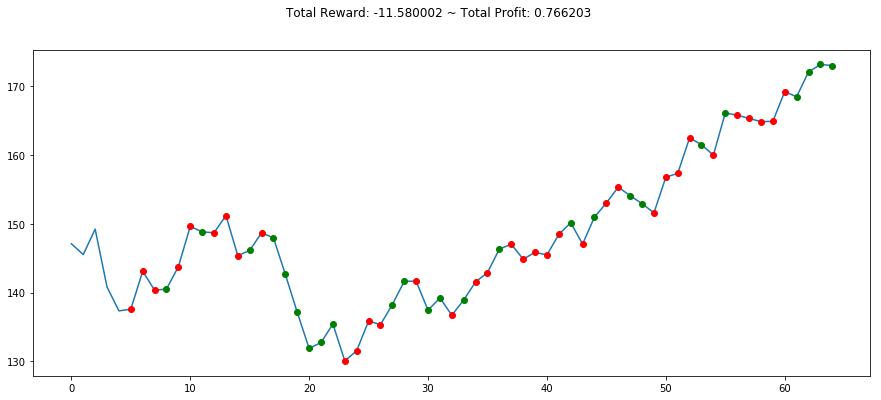

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()